# 1:40

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Regularization 
is a technique used in machine learning to prevent overfitting by adding a penalty to the model's complexity. The goal is to make the model simpler and more generalizable to new, unseen data.

### There are two common types of regularization:

#### L1 Regularization (Lasso): 
Adds a penalty proportional to the absolute values of the model's coefficients, encouraging some coefficients to become zero, which leads to sparse models.
#### L2 Regularization (Ridge): 
Adds a penalty proportional to the square of the coefficients, discouraging large values but not necessarily driving them to zero.

- Regularization helps in improving model performance by reducing the risk of overfitting, especially when the dataset has many features or noise.

# 1:58

In [4]:
df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
df.drop("name",axis = 1 , inplace = True)

In [6]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


# 2:50

In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
df["horsepower"] = df["horsepower"].fillna(df.horsepower.median())
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

# 4.08

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


# 4.56 

In [13]:
# we need to convert the origin column into numerical datatype
df["origin"].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [14]:
# df["origin"] = df["origin"].map({"usa": 1, "japan": 2, "europe": 3})
# df.dropna(subset=["origin"], inplace=True)
# df["origin"] = df["origin"].astype(int)


In [15]:
# df["origin"].value_counts()

In [16]:
df["origin"].dropna()

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [17]:
values = df["origin"].values
print(values)


['usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa'
 'usa' 'usa' 'japan' 'usa' 'usa' 'usa' 'japan' 'europe' 'europe' 'europe'
 'europe' 'europe' 'usa' 'usa' 'usa' 'usa' 'usa' 'japan' 'usa' 'japan'
 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa'
 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'europe' 'europe' 'europe' 'japan'
 'japan' 'europe' 'usa' 'japan' 'usa' 'europe' 'usa' 'usa' 'usa' 'usa'
 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'japan' 'usa' 'usa' 'usa' 'usa'
 'europe' 'europe' 'europe' 'europe' 'usa' 'japan' 'japan' 'usa' 'japan'
 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa'
 'usa' 'usa' 'usa' 'usa' 'usa' 'europe' 'usa' 'usa' 'usa' 'usa' 'usa'
 'japan' 'usa' 'japan' 'japan' 'usa' 'usa' 'europe' 'usa' 'usa' 'europe'
 'europe' 'europe' 'europe' 'usa' 'europe' 'japan' 'usa' 'usa' 'usa' 'usa'
 'usa' 'japan' 'usa' 'japan' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa' 'usa'
 'usa' 'usa' 'europe' 'europe' 'europe' 'japan' 'japan' 

In [18]:
# Initialize an empty list to store the encoded values
encoded_values = []

# Iterate over each value in the 'origin' column and assign values
for value in df["origin"]:
    if value == "usa":
        encoded_values.append(1)
    elif value == "japan":
        encoded_values.append(2)
    else:
        encoded_values.append(3)  # Assign a default value for unmatched cases

# Add the encoded values to a new column in the DataFrame
df["origin"] = encoded_values

# Print the DataFrame
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,3
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [19]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
dtype: object

# 6:43

In [21]:
# Seperate X and y 
X = df.drop("mpg", axis=1)
X
y = df["mpg"]

In [22]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

# 7:30

In [24]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# 9.35

# Multiple Linear Regression

In [26]:
# Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [27]:
regression_model = LinearRegression()

In [28]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [52]:
# Determiin theCoreficinets for each feature and determine relative importance of each feature 
for i,x in enumerate(X_train.columns):
    print(x,regression_model.coef_[i])

cylinders -0.21653780216832766
displacement 0.01987993620887507
horsepower -0.012704816241841277
weight -0.007164698157663289
acceleration 0.09047636715999383
model_year 0.8460420672591438
origin 1.42800006516009


#### Relative importance: 
The model year and origin have the largest impact on mpg, with model year showing a particularly strong positive relationship. 
The other features (such as cylinders, horsepower, and weight) have smaller coefficients and thus less impact on mpg, though they are still important.

In [54]:
# Determine the r2_score for Linear regression Model
from sklearn.metrics import r2_score

In [72]:
y_pred_reg = regression_model.predict(X_test)
r2_score_reg = r2_score(y_test,y_pred_reg)
print(r2_score_reg)

0.8563012451456409


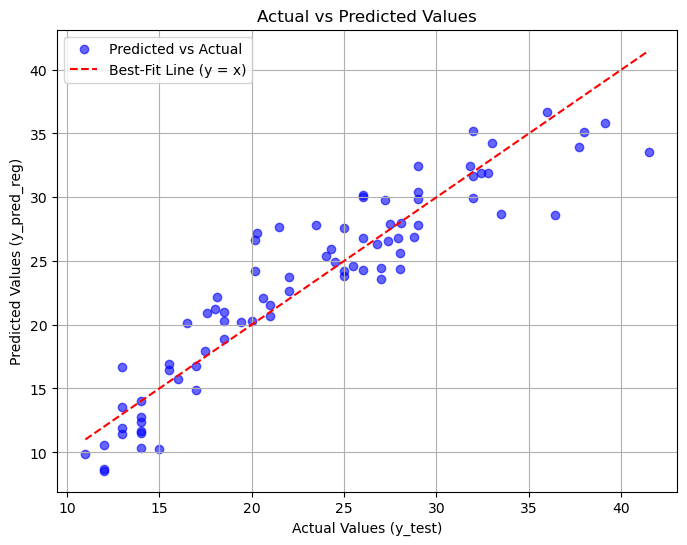

In [126]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plot the best-fit line (y = x line for perfect predictions)
x_line = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='Best-Fit Line (y = x)')

# Adding labels, title, and legend
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred_reg)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# 16:44

# Ridge Regression

In [76]:
from sklearn.linear_model import Ridge

In [80]:
ridge_model = Ridge(alpha=0.1)

In [82]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [86]:
# Determiin theCoreficinets for each feature and determine the relative importance of each feature 
for i,x in enumerate(X_train.columns):
    print(x,ridge_model.coef_[i])

cylinders -0.21615305026028067
displacement 0.0198622158111149
horsepower -0.012697324116592908
weight -0.007164428584491187
acceleration 0.09045740164184264
model_year 0.845974707406231
origin 1.4266691004781573


Ridge Regression has slightly smaller coefficients compared to Linear Regression, especially for features like cylinders, horsepower, and origin. 
This indicates that the regularization (penalty) in Ridge Regression reduces the impact of features with larger coefficients, helping to prevent overfitting.

The relative importance of features like model year and origin is still high, and features like weight, acceleration, and displacement maintain their effect on mpg.

Overall, Ridge Regression provides a more robust model by slightly shrinking the feature coefficients, which helps in reducing overfitting while still capturing the important relationships between features and mpg.

In [88]:
# detrmine the r2_score for the Ride regression Model
y_pred_ridge = ridge_model.predict(X_test)
r2_score_ridge = r2_score(y_test,y_pred_ridge)
r2_score_ridge

0.8563026607885916

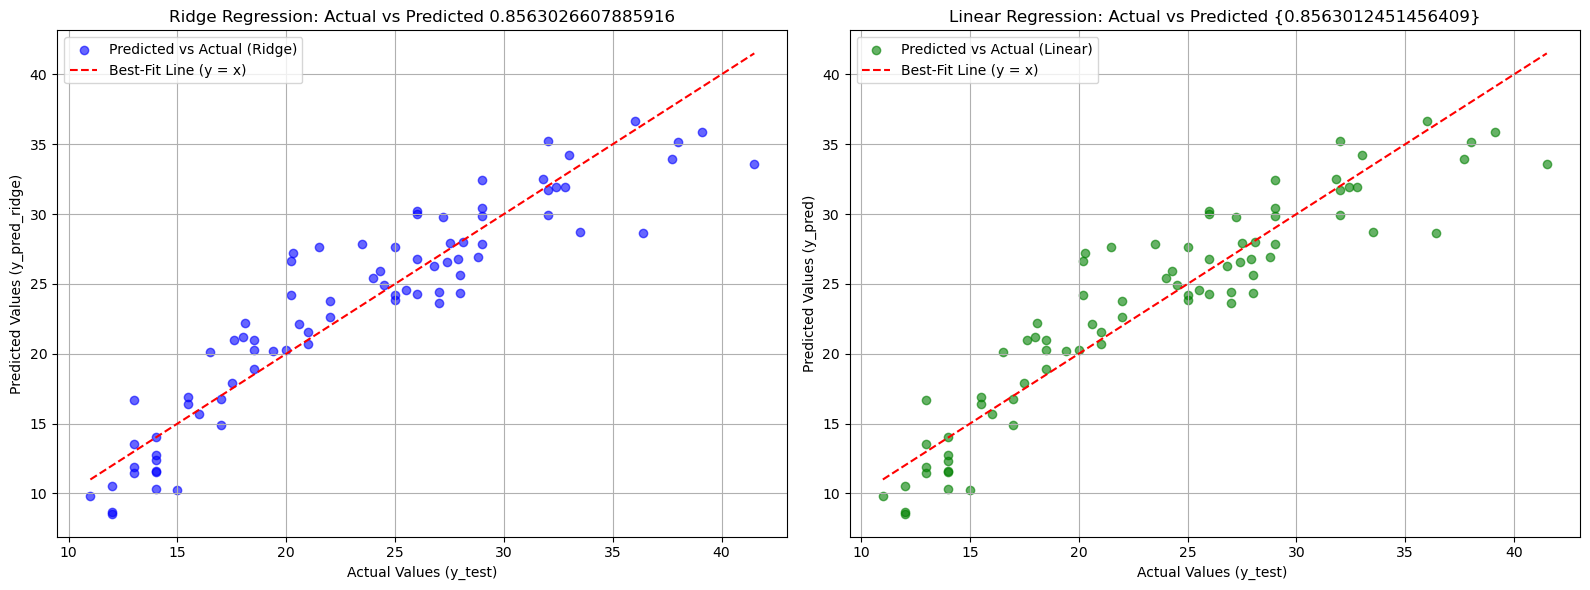

In [142]:
# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Ridge Regression (y_pred_ridge)
axs[0].scatter(y_test, y_pred_ridge, color='blue', alpha=0.6, label=f'Predicted vs Actual (Ridge)')
x_line = np.linspace(y_test.min(), y_test.max(), 100)
axs[0].plot(x_line, x_line, color='red', linestyle='--', label='Best-Fit Line (y = x)')
axs[0].set_title(f"Ridge Regression: Actual vs Predicted {r2_score_ridge}")
axs[0].set_xlabel("Actual Values (y_test)")
axs[0].set_ylabel("Predicted Values (y_pred_ridge)")
axs[0].legend()
axs[0].grid(True)

# Plot for Linear Regression (y_pred)
axs[1].scatter(y_test, y_pred_reg, color='green', alpha=0.6, label=f"Predicted vs Actual (Linear)")
axs[1].plot(x_line, x_line, color='red', linestyle='--', label='Best-Fit Line (y = x)')
axs[1].set_title(f"Linear Regression: Actual vs Predicted { {r2_score_reg}}")
axs[1].set_xlabel(f"Actual Values (y_test) ")
axs[1].set_ylabel("Predicted Values (y_pred)")
axs[1].legend()
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# 21.00

# Lasso regression 

In [92]:
# determine the coefficients for all the columns by trainng the dataset on Lassson Linear regression
from sklearn.linear_model import Lasso

In [96]:
lasso_reg = Lasso(alpha=0.5)

In [98]:
lasso_reg_model = lasso_reg.fit(X_train,y_train)

In [100]:
# Determiin theCoreficinets for each feature and determine relative importance of each feature 
for i,x in enumerate(X_train.columns):
    print(x,lasso_reg_model.coef_[i])

cylinders -0.0
displacement 0.001977271655174121
horsepower -0.009291692111718737
weight -0.006589928565464692
acceleration 0.0
model_year 0.753208006248849
origin 0.0


Lasso Regression tends to shrink some coefficients to zero, effectively removing features like cylinders, acceleration, and origin from the model.
This is a result of the L1 regularization (penalty), which helps in feature selection by setting less important feature coefficients to zero.

Model year remains a key predictor, and features like displacement, horsepower, and weight still have small but non-zero coefficients, suggesting weak influence on mpg.

Lasso Regression is useful for simplifying models by automatically performing feature selection and reducing the number of features contributing to the prediction.

In [102]:
# we can choose to eleiminate the columns with zero ccoefficients 

In [104]:
# deterimne the r2-score for lasso regression model 
y_pred_lasso = lasso_reg_model.predict(X_test)

In [108]:
r2_score_lasso = r2_score(y_test,y_pred_lasso)
r2_score_lasso

0.8457765614927952

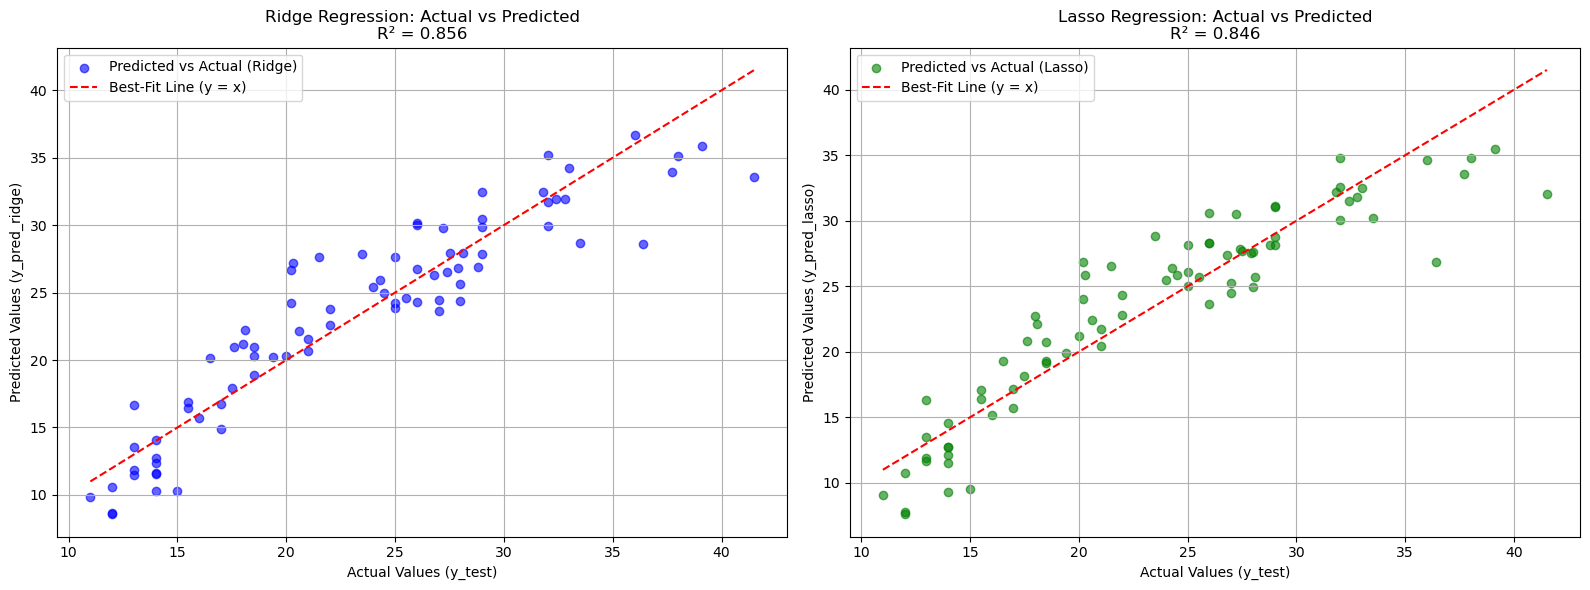

In [144]:
# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Ridge Regression (y_pred_ridge)
axs[0].scatter(y_test, y_pred_ridge, color='blue', alpha=0.6, label='Predicted vs Actual (Ridge)')
x_line = np.linspace(y_test.min(), y_test.max(), 100)
axs[0].plot(x_line, x_line, color='red', linestyle='--', label='Best-Fit Line (y = x)')
axs[0].set_title(f"Ridge Regression: Actual vs Predicted\nR² = {r2_score_ridge:.3f}")
axs[0].set_xlabel("Actual Values (y_test)")
axs[0].set_ylabel("Predicted Values (y_pred_ridge)")
axs[0].legend()
axs[0].grid(True)

# Plot for Lasso Regression (y_pred_lasso)
axs[1].scatter(y_test, y_pred_lasso, color='green', alpha=0.6, label='Predicted vs Actual (Lasso)')
axs[1].plot(x_line, x_line, color='red', linestyle='--', label='Best-Fit Line (y = x)')
axs[1].set_title(f"Lasso Regression: Actual vs Predicted\nR² = {r2_score_lasso:.3f}")
axs[1].set_xlabel("Actual Values (y_test)")
axs[1].set_ylabel("Predicted Values (y_pred_lasso)")
axs[1].legend()
axs[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# 25:00

# Elastic Net regularization

In [112]:
from sklearn.linear_model import ElasticNet

In [114]:
elast_net_model = ElasticNet(alpha=1,l1_ratio=0.5)

In [116]:
elast_net_model.fit(X_train,y_train)

ElasticNet(alpha=1)

In [118]:
# Determiin theCoreficinets for each feature and determine relative importance of each feature 
for i,x in enumerate(X_train.columns):
    print(x,elast_net_model.coef_[i])

cylinders -0.0
displacement 0.0015384959190967642
horsepower -0.010641957002071874
weight -0.0065326085946102105
acceleration 0.0
model_year 0.7203541472156388
origin 0.0


In [120]:
# determine the r2_score for the elastic net model
y_pred_elast = elast_net_model.predict(X_test)

In [122]:
r2_elast_net = r2_score(y_pred_elast,y_test)

In [124]:
r2_elast_net

0.841610727344146

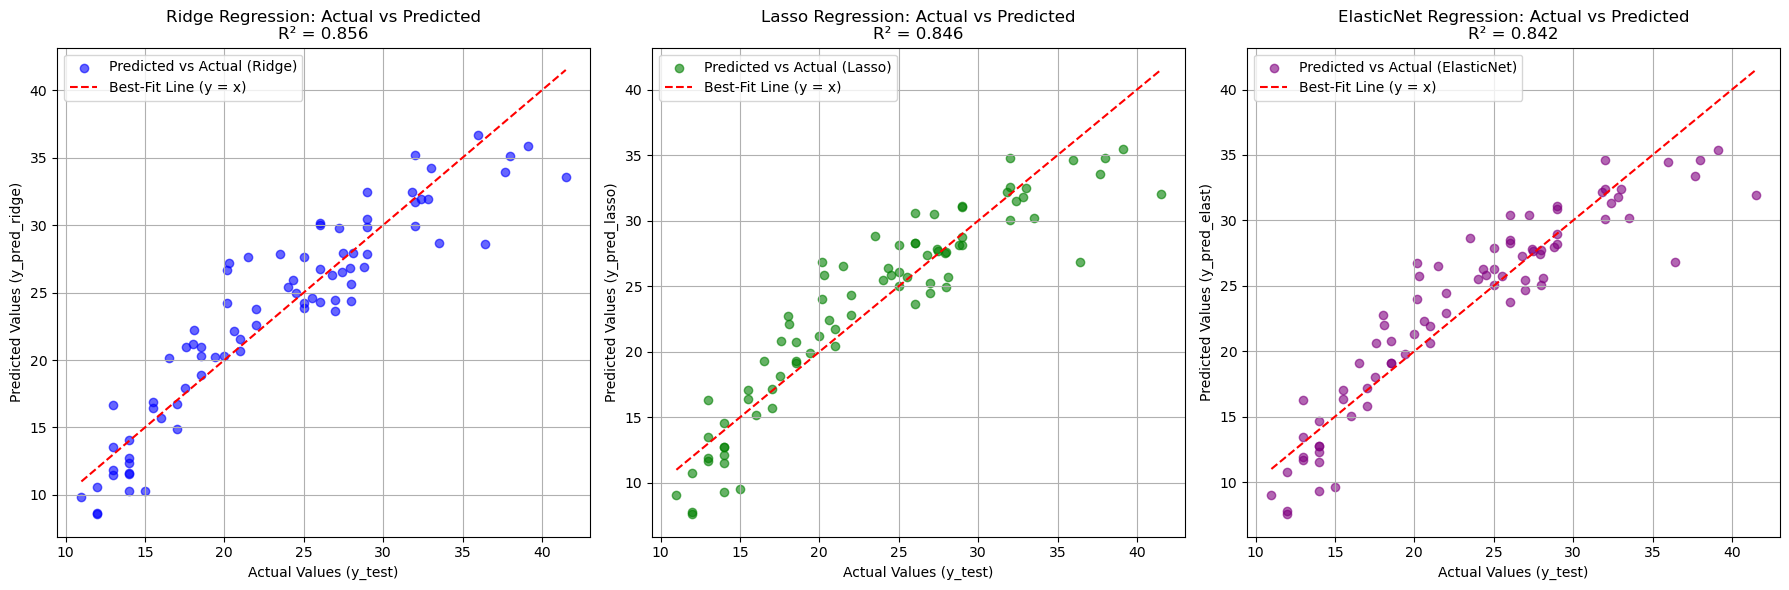

In [146]:
# Set up the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Ridge Regression (y_pred_ridge)
axs[0].scatter(y_test, y_pred_ridge, color='blue', alpha=0.6, label='Predicted vs Actual (Ridge)')
x_line = np.linspace(y_test.min(), y_test.max(), 100)
axs[0].plot(x_line, x_line, color='red', linestyle='--', label='Best-Fit Line (y = x)')
axs[0].set_title(f"Ridge Regression: Actual vs Predicted\nR² = {r2_score_ridge:.3f}")
axs[0].set_xlabel("Actual Values (y_test)")
axs[0].set_ylabel("Predicted Values (y_pred_ridge)")
axs[0].legend()
axs[0].grid(True)

# Plot for Lasso Regression (y_pred_lasso)
axs[1].scatter(y_test, y_pred_lasso, color='green', alpha=0.6, label='Predicted vs Actual (Lasso)')
axs[1].plot(x_line, x_line, color='red', linestyle='--', label='Best-Fit Line (y = x)')
axs[1].set_title(f"Lasso Regression: Actual vs Predicted\nR² = {r2_score_lasso:.3f}")
axs[1].set_xlabel("Actual Values (y_test)")
axs[1].set_ylabel("Predicted Values (y_pred_lasso)")
axs[1].legend()
axs[1].grid(True)

# Plot for ElasticNet Regression (y_pred_elast)
axs[2].scatter(y_test, y_pred_elast, color='purple', alpha=0.6, label='Predicted vs Actual (ElasticNet)')
axs[2].plot(x_line, x_line, color='red', linestyle='--', label='Best-Fit Line (y = x)')
axs[2].set_title(f"ElasticNet Regression: Actual vs Predicted\nR² = {r2_elast_net:.3f}")
axs[2].set_xlabel("Actual Values (y_test)")
axs[2].set_ylabel("Predicted Values (y_pred_elast)")
axs[2].legend()
axs[2].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()